In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [6]:
# глобальные переменные, которые нам нужны для генерации всех шумов. Можно обойтись и без них.

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)
white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)
print(white_noise_simple)

[0.00989564 0.0177434  0.82711212 ... 0.52531829 0.23896837 0.75184843]


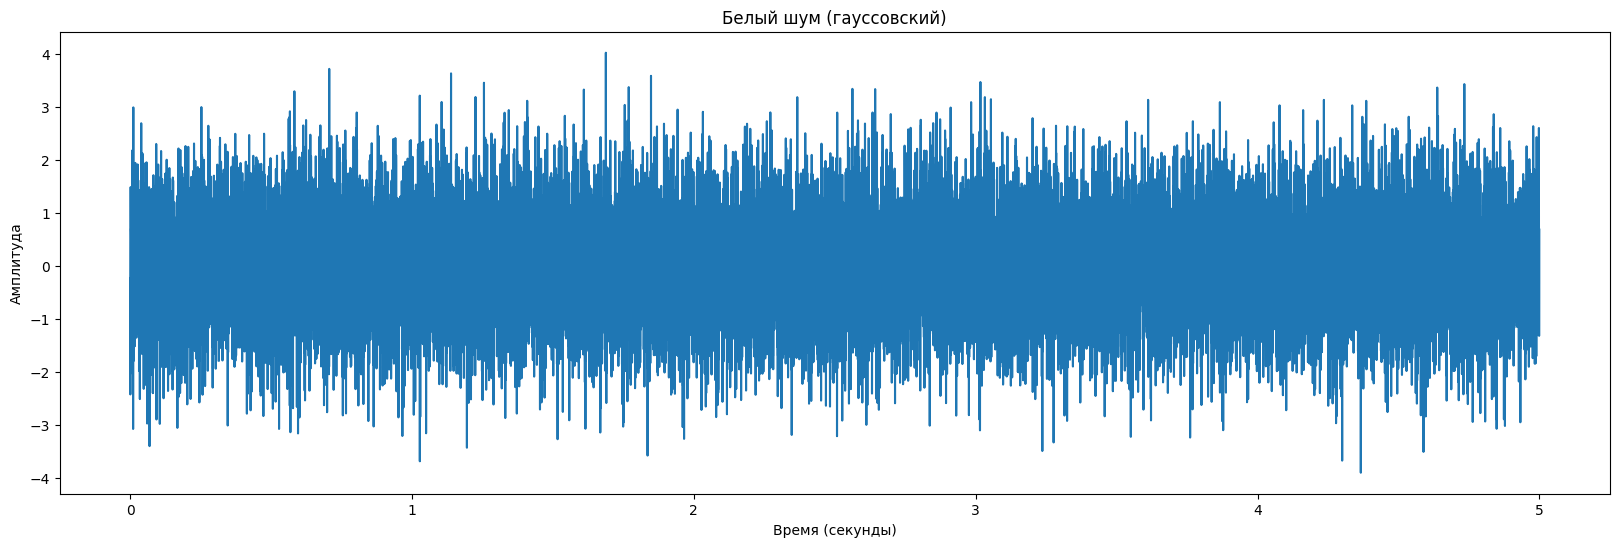

In [9]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_g)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_g)

# заголовки
plt.title('Белый шум (гауссовский)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [8]:
#аудио
def play_audio(audio_data, sample_rate):
    sd.play(audio_data,sample_rate)
    sd.wait()
#play_audio(white_noise,sample_rate)

Генерация розового шума путем применения преобразования Фурье к гауссовскому белому шуму

[-0.29060476 -0.37995385 -0.34560466 ...  0.26841537 -0.34560466
 -0.37995385]


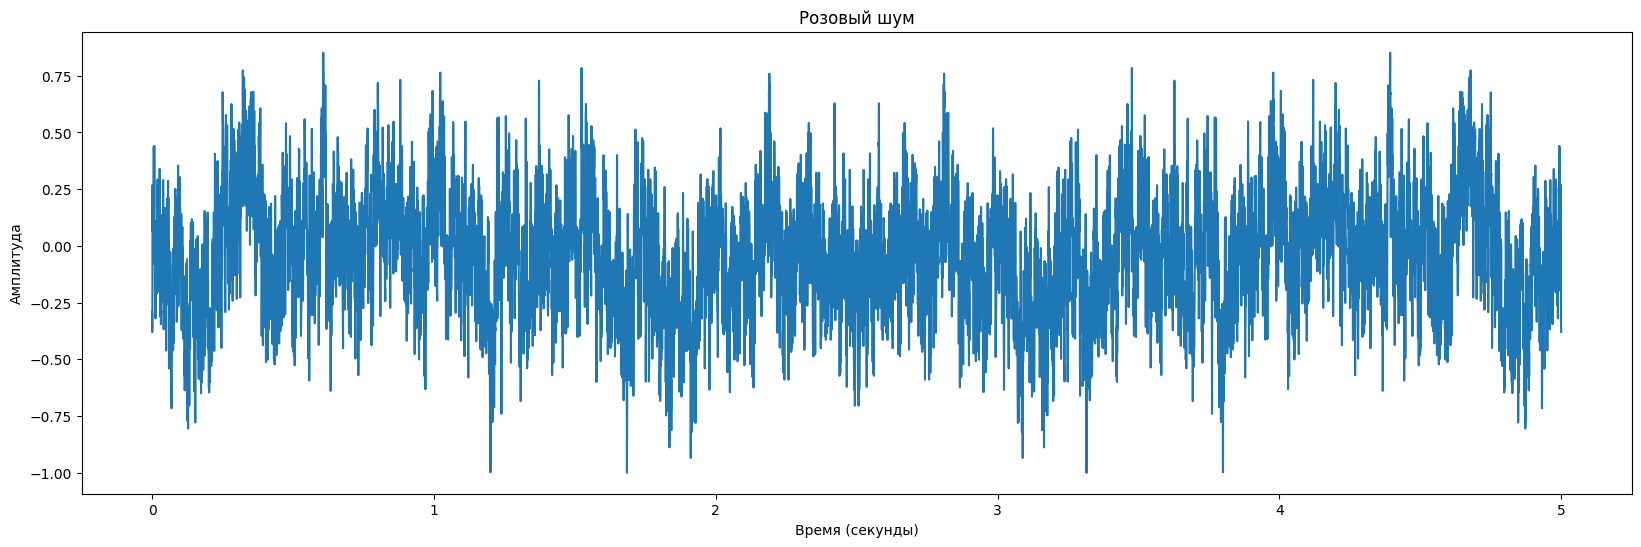

In [28]:
spectrum = np.fft.rfft(white_noise_g)
pink_noise = np.real(spectrum) / np.sqrt(np.arange(1, len(spectrum) + 1))
pink_noise_real = np.fft.irfft(pink_noise, n=num_samples) / np.max(np.abs(np.fft.irfft(pink_noise, n=num_samples) ))
print(pink_noise_real)


time_axis = np.linspace(0, duration, len(pink_noise_real)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise_real)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()


Генерация черного шума, как шума абсолютно черного тела при температуре 17 нанокельвинов

In [30]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

1.380649e-23
6.62607015e-34
299792458.0


In [31]:
sd.play(black_noise, freq1)
sd.wait()

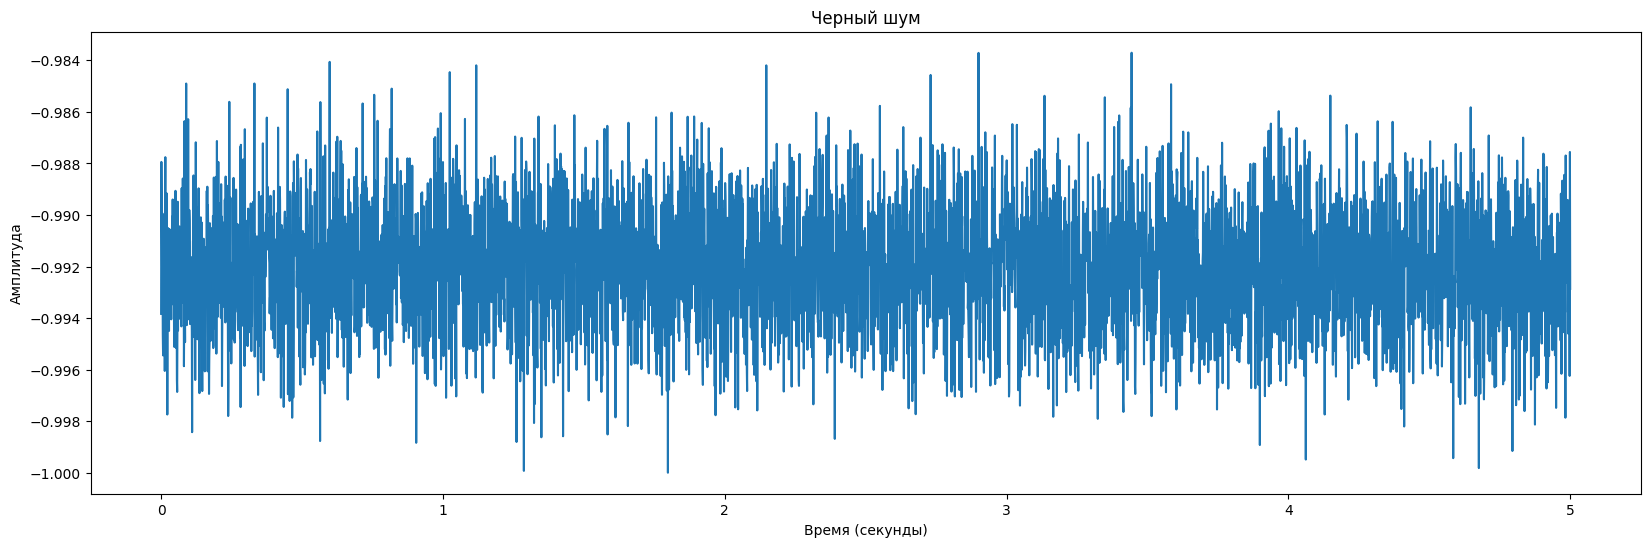

In [32]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

Генерация временных рядов
Этот код создает пример временного ряда, представленного как sinh с добавлением случайного шума.

In [39]:
duration = 15  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_points = duration*sample_rate  # количество точек
time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд
white_noise_base = np.random.normal(0,1,size=num_points)  # Генерим белый шум
values = np.sinh(time_points) # вычисляем амплитуды сигнала по синусоидальному закону
values_noise = values + white_noise_base # зашумляем сигнал

/var/folders/k_/ygbwpkdn4dn6f0kwtbykqvz00000gn/T/ipykernel_21244/3243344297.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


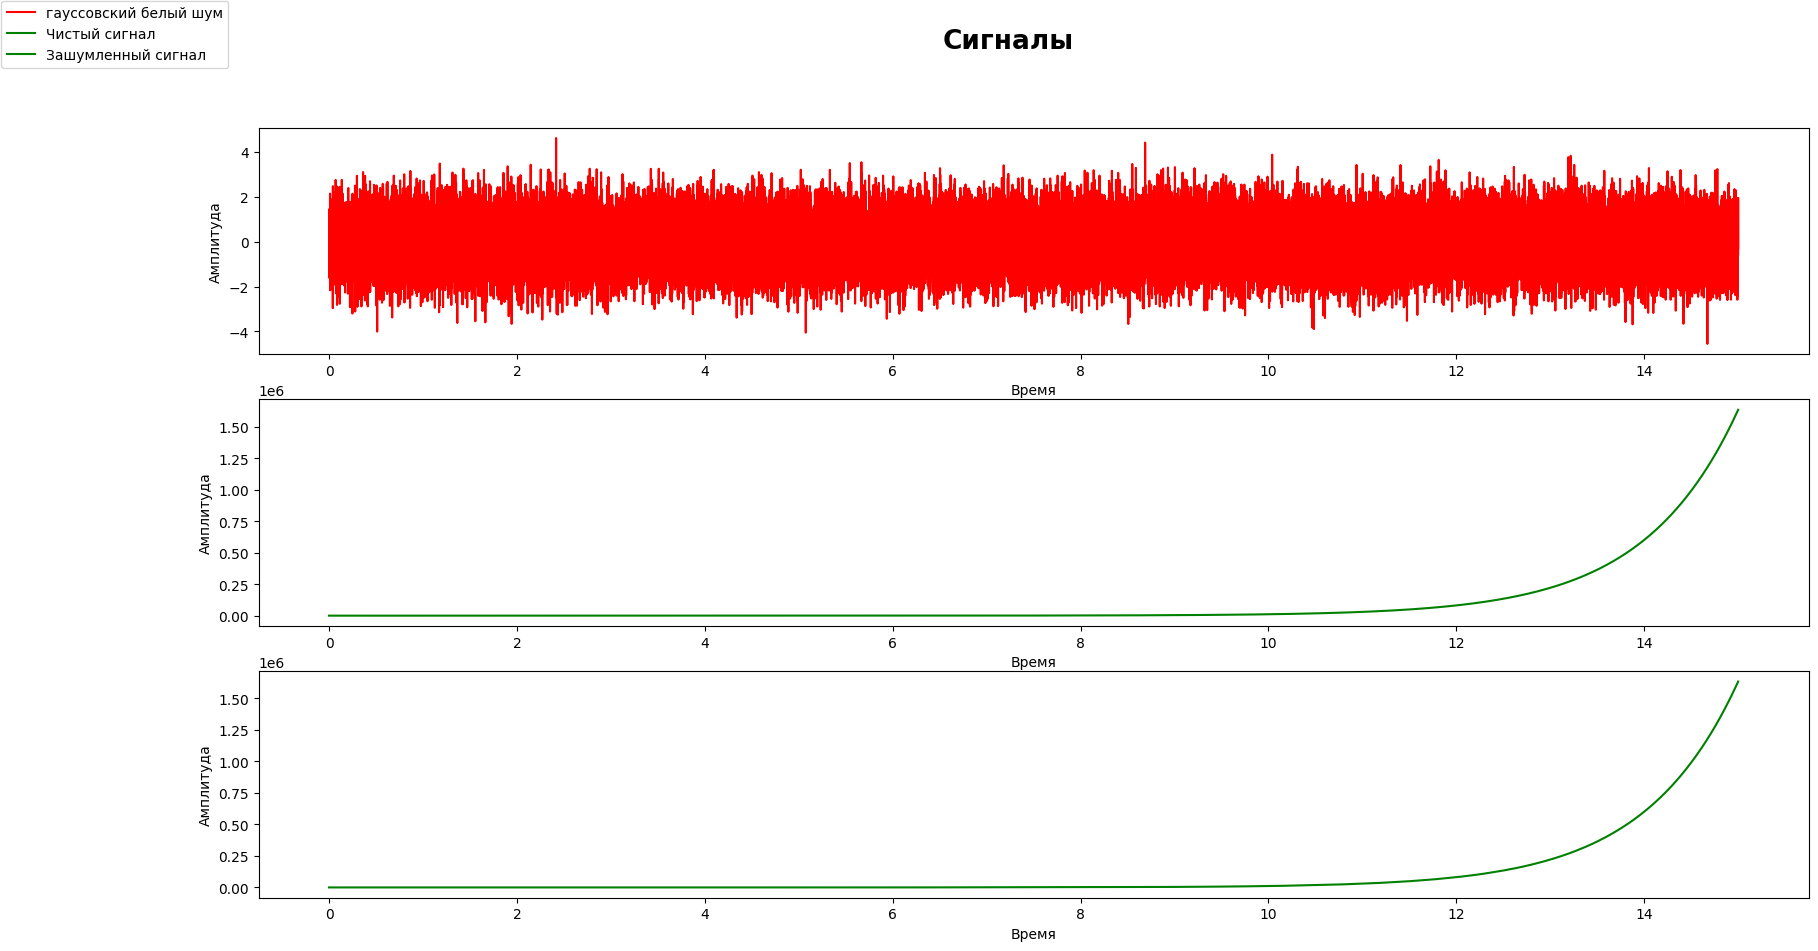

In [40]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)
